In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
df=pd.read_csv("2.crop_production.csv")

In [3]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [4]:
df.shape

(246091, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


# Attributes

State_name = Name of States in India <br>
Districts_Name = Name of Districts in India  <br>
Crop_Year = Year of Crop Production <br>
Season = Season of the Crops  <br>
Crop = Name of the Crop Sown  <br>
Area = Area Under cultivation (Numerical) <br>
Production = Production of the crops (Numerical) <br>


### PANDAS PROFILE REPORT

In [6]:
from pandas_profiling import ProfileReport

In [7]:
profile=ProfileReport(df,title="pandas profile report")

In [8]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
#Checking null value
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [10]:
# we have approx 243000 rows and out of that 3730 were null so we decided to drop these rows for better analysis

df.dropna(inplace=True)

In [11]:
# after droping null values

df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

### Describing the basic statistics of the data.

In [12]:
df.describe()

,Crop_Year,Area,Production
count,242361.000000,2.423610e+05,2.423610e+05
mean,2005.625773,1.216741e+04,5.825034e+05
std,4.958285,5.085744e+04,1.706581e+07
min,1997.000000,1.000000e-01,0.000000e+00
25%,2002.000000,8.700000e+01,8.800000e+01
50%,2006.000000,6.030000e+02,7.290000e+02
75%,2010.000000,4.545000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [13]:
df.nunique()

State_Name          33
District_Name      646
Crop_Year           19
Season               6
Crop               124
Area             38391
Production       51627
dtype: int64

### Checking Unique Values In State_name

In [14]:
df.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

### Checking Unique Values In District_name

In [15]:
df.District_Name.unique()

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

### Checking Unique Values In Crop_Year

In [16]:
df.Crop_Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015], dtype=int64)

### Checking Unique Values In Season

In [17]:
df.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [18]:
# here we remove unwanted white spaces from season column 

df['Season']=df['Season'].apply(lambda x : x.strip())
df['Crop']=df['Crop'].apply(lambda x : x.strip())

In [19]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [20]:
# after removing white spaces

df.Season.unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

In [21]:
# checking the values counts of each season

df['Season'].value_counts()

Kharif        94283
Rabi          66160
Whole Year    56127
Summer        14811
Winter         6050
Autumn         4930
Name: Season, dtype: int64

In [22]:
'''since there are Three types of crop out of which two are mainly seasonal Rabi and Kharif and one is for whole year but
 5 crops season were present in our datset.we got to know that summer and Autumn synonyms of Kharif and winter is synonyms of
 of Rabi so we decided to replace with their original name which is Kharif Rabi'''

df['Season']=df['Season'].apply(lambda x : x.replace('Autumn','Kharif'))
df['Season']=df['Season'].apply(lambda x : x.replace('Summer','Kharif'))
df['Season']=df['Season'].apply(lambda x : x.replace('Winter','Rabi'))

In [23]:
#Checking values counts of season after replacing

df['Season'].value_counts()

Kharif        114024
Rabi           72210
Whole Year     56127
Name: Season, dtype: int64

### Checking Unique Values In Crop

In [24]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [25]:
df.Crop.unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garli

###### we observed that many crops were presenyed with their synonyms so we decided all synonyms of crops to replace with their popular name like paddy and rice are same so we replace paddy with Rice also number of rows of crops sub-category were very less

In [26]:
# we have replaced  kapas to cotton etc.

df['Crop']=df['Crop'].apply(lambda x:x.replace('Kapas','Cotton(lint)')
                                      .replace('Cotton(lint)','Cotton'))

df.replace('Jute & mesta','Jute',inplace=True)
df.replace('Mesta','Jute',inplace=True)

In [27]:
# we have replace sub-category of pulses with pulse

df['Crop']=df['Crop'].apply(lambda x:x.replace('Other Kharif pulses','pulses')
                                    .replace('Other  Rabi pulses','pulses')
                                    .replace('Peas & beans (Pulses)','pulses')
                                    .replace('Pulses total','pulses')
                                    .replace('other misc. pulses','pulses')
                                    .replace('Moong(Green Gram)','pulses')
                                    .replace('Urad','pulses')
                                    .replace('Arhar/Tur','pulses')
                                    .replace('Bean','pulses')
                                    .replace('Ricebean (nagadal)','pulses')
                                    .replace('Lentil','pulses')
                                    .replace('Masoor','pulses')
                                    .replace('Khesari','pulses')
                                    .replace('Horse-gram','pulses')
                                    .replace('Rajmash Kholar','pulses'))

In [28]:
#we have corrected spelling mistake

df['Crop']=df['Crop'].apply(lambda x:x
                                    .replace('Atcanut (Raw)','Arecanut')
                                    .replace('Arcanut (Processed)','Arecanut')
                                    .replace('Arecanut','Arecanut'))

In [29]:
# we have replaced varienty of spices with othe spices

df['Crop']=df['Crop'].apply(lambda x:x
                                    .replace('Black pepper','Other Spices')
                                    .replace('Cardamom','Other Spices')
                                    .replace('Perilla','Other Spices'))

In [30]:
#since number of rows for every fruits category were very less so we decided to megre all to fruits

df['Crop']=df['Crop'].apply(lambda x:x
                                    .replace('Papaya','Fruits')
                                    .replace('Mango','Fruits')
                                     .replace('Orange','Fruits')
                                     .replace('Other Fresh Fruits','Fruits')
                                     .replace('Pineapple','Fruits')
                                     .replace('Citrus Fruit','Fruits')
                                     .replace('Pome Fruit','Fruits')
                                     .replace('Pome Granet','Fruits')
                                     .replace('Grapes','Fruits')
                                     .replace('Jack Fruit','Fruits')
                                     .replace('Sapota','Fruits')
                                     .replace('Lemon','Fruits'))


In [31]:
# we have replace sub-category with their main-category 

df['Crop']=df['Crop'].apply(lambda x:x
                                    .replace('Ginger','Dry ginger'))

df['Crop']=df['Crop'].apply(lambda x:x
                                    .replace('Turnip','Onion'))

df['Crop']=df['Crop'].apply(lambda x:x
                                      .replace('Cashewnut Raw','Cashewnut')
                                      .replace('Cashewnut Processed','Cashewnut'))

In [32]:
# we have replace sub-category of gram with their main-category 

df['Crop']=df['Crop'].apply(lambda x:x
                                      .replace('black gram','gram')
                                     .replace('Moth','gram')
                                     .replace('Blackgram','gram'))

In [33]:
# we have replace other Oilseeds total to  other oilseeds

df['Crop']=df['Crop'].apply(lambda x:x
                                      .replace('Oilseeds total' ,'other oilseeds')
                                      .replace('Niger seed' ,'other oilseeds'))

In [34]:
# we have replace sub-category of milltes with their main-category 

df['Crop']=df['Crop'].apply(lambda x:x
                                      .replace('Other Cereals & Millets' ,'Bajra')
                                      .replace('Samai' ,'Bajra')
                                      .replace('Small millets' ,'Bajra')
                                      .replace('Ragi','Bajra')
                                      .replace('Varagu','Bajra')
                                      .replace('Jobster','Bajra'))

In [35]:
# we have replace sub-category of Vegetables with their main-category 

df['Crop']=df['Crop'].apply(lambda x:x
                                     .replace('Coriander' ,'Other Vegetables')
                                     .replace('pulsess & Mutter(Vegetable)' ,'Other Vegetables')
                                     .replace('Bhindi' ,'Other Vegetables')
                                     .replace('Tomato','Other Vegetables')
                                     .replace('Cowpea(Lobia)','Other Vegetables')
                                     .replace('Cabbage','Other Vegetables')
                                     .replace('Carrot','Other Vegetables')
                                     .replace('Drum Stick','Other Vegetables')
                                     .replace('Redish','Other Vegetables')
                                     .replace('Cauliflower','Other Vegetables')
                                     .replace('Colocosia','Other Vegetables')
                                     .replace('Brinjal','Other Vegetables')
                                     .replace('Bottle Gourd','Other Vegetables')
                                     .replace('Bitter Gourd','Other Vegetables'))

In [36]:
#we have replace sub-category with their main-category

df['Crop']=df['Crop'].apply(lambda x:x.replace('Niger seed','Sesamum'))
df['Crop']=df['Crop'].apply(lambda x:x.replace('Korra','Total foodgrain'))
df['Crop']=df['Crop'].apply(lambda x:x.replace('Paddy','Rice'))

In [37]:
#we have observed some cropes rows are very very less so it wont make any sense to visualization so we decided to drop those rows

df.drop(df[df['Crop']=='Tea'].index,inplace=True)
df.drop(df[df['Crop']=='Coffee'].index,inplace=True)
df.drop(df[df['Crop']=='Rubber'].index,inplace=True)
df.drop(df[df['Crop']=='Cond-spcs other'].index,inplace=True)

In [38]:
# checking unique crops types after replacement

df.Crop.unique()

array(['Arecanut', 'pulses', 'Rice', 'Banana', 'Cashewnut', 'Coconut',
       'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Other Spices', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Groundnut', 'Sunflower', 'Bajra', 'Castor seed',
       'Cotton', 'Jowar', 'Total foodgrain', 'Tobacco', 'Gram', 'Wheat',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'Other Vegetables',
       'Potato', 'Soyabean', 'Fruits', 'Cucumber', 'other fibres', 'Jute',
       'Rapeseed &Mustard', 'Peas  (vegetable)', 'Garlic', 'gram',
       'Barley', 'Sannhamp', 'Guar seed', 'Snak Guard', 'Other Fruits',
       'Water Melon', 'Ash Gourd', 'Beet Root', 'Lab-Lab', 'Ribed Guard',
       'Yam', 'Pump Kin', 'Apple', 'Peach', 'Pear', 'Plums', 'Litchi',
       'Ber', 'Other Dry Fruit'], dtype=object)

# Production

In [39]:
# we have observed that many values of producation were 0 since it is represntating producation of whole district
# so we decided drop all rows whose producation values are zero

df.drop(df[df['Production']==0].index,inplace=True)

print(f'After removing the row which has 0 Production : {df.shape[0]}')

After removing the row which has 0 Production : 238723


In [40]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Kharif,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Kharif,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Rabi,Rice,279151.0,597899.0


In [41]:
# saving cleaned data file

df.to_csv('Crop_clean.csv')

In [42]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Kharif,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Kharif,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Rabi,Rice,279151.0,597899.0


### Since india very big country for better vislization we will divide states name in four zone (East , West , North ,South)  details of these zones are mentioned below

In [43]:
West_India= ['Maharashtra','Goa','Gujarat','Dadra and Nagar Haveli']
East_India= ['Arunachal Pradesh','Assam','Manipur','Meghalaya','Mizoram','Nagaland','Sikkim','Tripura','West Bengal','Bihar','Odisha','Jharkhand' ]
North_India=['Jammu and Kashmir ','Himachal Pradesh','Punjab','Uttarakhand','Haryana','Rajasthan','Uttar Pradesh','Chandigarh','Madhya Pradesh','Chhattisgarh']   # Delhi
South_India = ['Andhra Pradesh','Karnataka','Kerala','Tamil Nadu','Telangana','Puducherry']

In [44]:
# creating a list for zones
zone = []

for d in df['State_Name']:
    if d in West_India:
         zone.append('West India')
    elif d in East_India:
         zone.append('EastIndia')
    elif d in North_India:
         zone.append('North India')
    elif d in South_India: 
         zone.append('South India')
    else:
         zone.append('Union Territory')

In [45]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Kharif,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Kharif,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Rabi,Rice,279151.0,597899.0


In [46]:
# creatinh new column 
df['zone'] = zone

In [47]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,zone
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Union Territory
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,pulses,2.0,1.0,Union Territory
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Union Territory
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Union Territory
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Union Territory
...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Kharif,Rice,306.0,801.0,EastIndia
246087,West Bengal,PURULIA,2014,Kharif,Sesamum,627.0,463.0,EastIndia
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,EastIndia
246089,West Bengal,PURULIA,2014,Rabi,Rice,279151.0,597899.0,EastIndia


In [48]:
df['zone'].value_counts()

North India        92752
EastIndia          71482
South India        47554
West India         21229
Union Territory     5706
Name: zone, dtype: int64

In [49]:
# checking value counts of year in dataset

df['Crop_Year'].value_counts()

2003    15541
2002    15060
2007    14261
2008    14230
2006    13976
2004    13834
2010    13793
2011    13791
2009    13767
2005    13519
2013    13474
2000    13393
2012    13183
2001    13107
1999    12258
1998    11262
2014    10814
1997     8899
2015      561
Name: Crop_Year, dtype: int64

In [50]:
x=df['Production'].value_counts()

In [58]:
val=df.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].values
lab=df.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].index

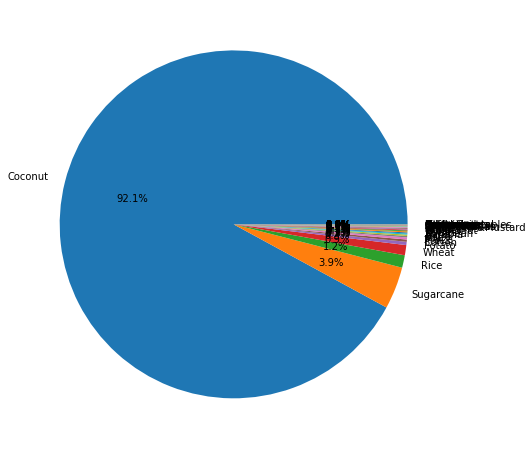

In [59]:
# we plotted pie chart of Production of different crops to check the outliers in crops
plt.figure(figsize=(10,8))
plt.pie(val,labels=lab,autopct='%0.1f%%')
plt.show()

### we have observed that Production of coconut is more than 92% of total Production so we not able to visualize our dataset so we have decided to visualize coconut separately

In [60]:
coconut_df = df[df['Crop'] == 'Coconut']

coconut_df.to_csv('coconut_df.csv')

df.drop(df[df['Crop']=='Coconut'].index,inplace=True)

In [61]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,zone
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Union Territory
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,pulses,2.0,1.0,Union Territory
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Union Territory
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Union Territory
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Union Territory
...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Kharif,Rice,306.0,801.0,EastIndia
246087,West Bengal,PURULIA,2014,Kharif,Sesamum,627.0,463.0,EastIndia
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,EastIndia
246089,West Bengal,PURULIA,2014,Rabi,Rice,279151.0,597899.0,EastIndia


<AxesSubplot:ylabel='Production'>

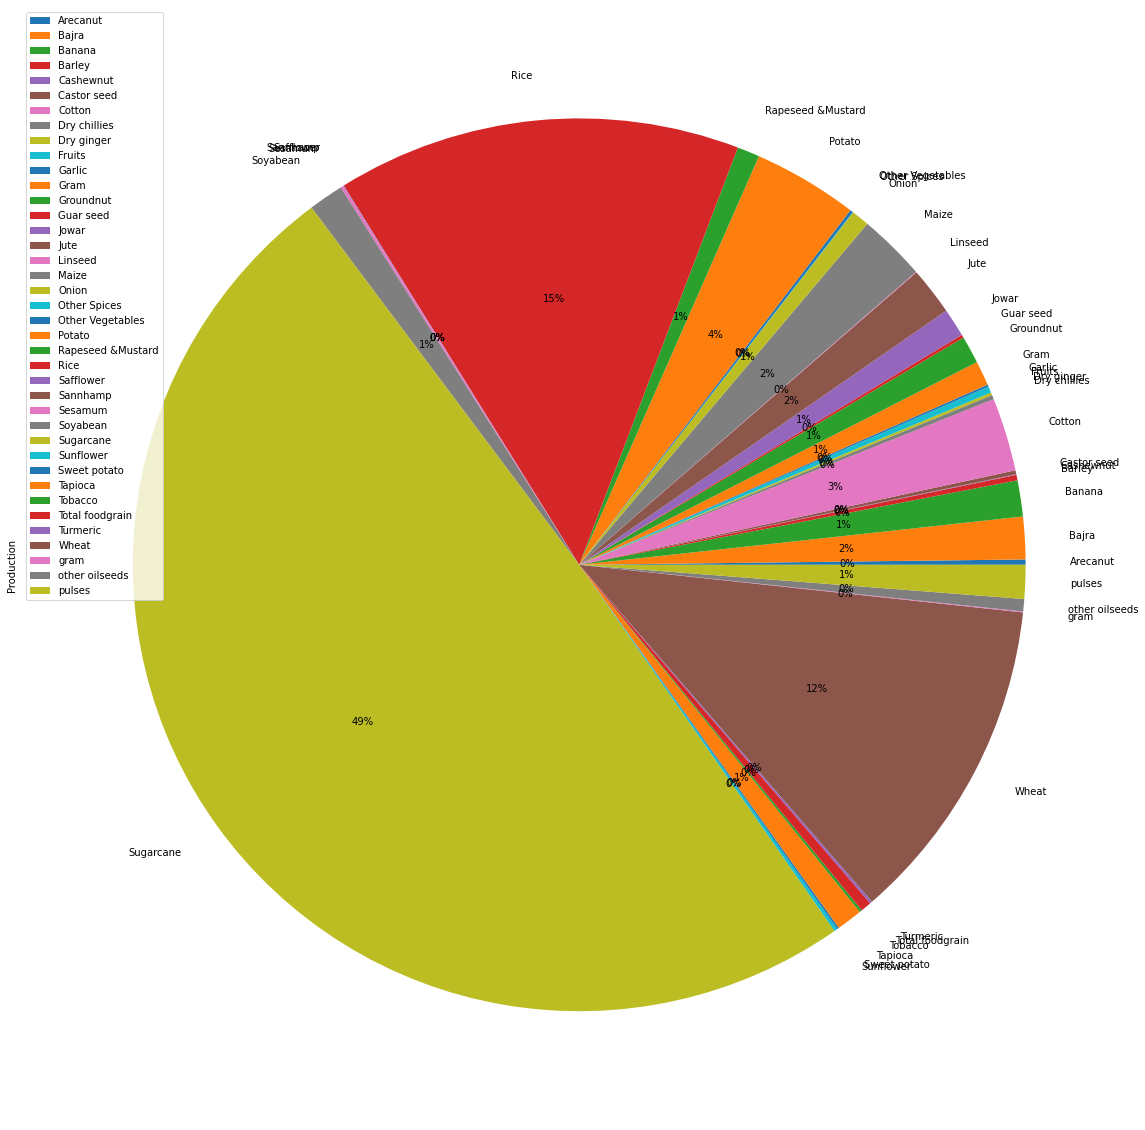

In [62]:
df.groupby(['Crop']).sum().plot(kind='pie', y='Production', autopct='%1.0f%%',figsize=(20,30))


In [63]:
df.to_csv('crop.csv')